Goal of this notebook:

Explore Random Forest (XGBoost) hyperparameters to find the best common combination among all projects.

Outputs: 
- Validation curves for each hyperparameter
- Best combination of Random Forest (XGBoost) hyperparameters

In [1]:
import numpy as np
import pandas as pd
from IPython.core.display import display
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', None)
from xgboost import XGBRFClassifier
import warnings
import classifier_utils
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer
import math

In [2]:
non_features_columns = ["chunk_id", "line_start", "line_end", "line_separator", "kind_conflict", "url", "project"]
non_features_columns.extend(["project_user", "project_name", "path", "file_name", "sha", "leftsha", "rightsha", "basesha"])

In [3]:
selected_dataset = pd.read_csv("../../data/SELECTED_LABELLED_DATASET.csv")
projects = list(selected_dataset['project'].unique())

In [4]:
df_training = pd.read_csv("../../data/dataset-training.csv")
target_names = sorted(list(df_training['developerdecision'].unique()))
df_na = df_training[df_training.isna().any(axis=1)]

len(df_na) / len(df_training)

0.24562591468076275

### Base classifier

In [5]:
rf_xg = XGBRFClassifier(random_state=99, subsample=0.9, eval_metric='mlogloss')

In [6]:
result_rf_xg = classifier_utils.ProjectsResults(rf_xg, projects, non_features_columns, drop_na=False)

In [7]:
report_rf_xg = result_rf_xg.get_report_df(include_overall=True)
report_rf_xg

,project,observations,observations (wt NaN),precision,recall,f1-score,accuracy,baseline (majority),improvement
0,CCI-MIT__XCoLab,5512,5512,0.968000,0.975000,0.972000,0.975000,0.454000,0.95400
1,apache__directory-server,845,845,0.920000,0.923000,0.921000,0.923000,0.515000,0.84100
2,jgralab__jgralab,2072,2072,0.798000,0.803000,0.796000,0.803000,0.480000,0.62200
3,Unidata__thredds,1154,1154,0.895000,0.903000,0.893000,0.903000,0.775000,0.56900
4,getrailo__railo,815,815,0.745000,0.763000,0.752000,0.763000,0.459000,0.56200
5,apache__accumulo,4113,4113,0.833000,0.849000,0.837000,0.849000,0.687000,0.51700
6,TeamDev-Ltd__OpenFaces,2979,2979,0.958000,0.961000,0.959000,0.961000,0.924000,0.48900
7,Ramblurr__Anki-Android,892,892,0.676000,0.709000,0.689000,0.709000,0.436000,0.48300
8,CloudStack-extras__CloudStack-archive,1424,1424,0.696000,0.708000,0.694000,0.708000,0.453000,0.46600
9,apache__lucene-solr,1256,1256,0.580000,0.585000,0.582000,0.585000,0.289000,0.41700


In [8]:
result_rf_xg.get_accuracy_per_class_df(target_names, include_overall=True)

,project,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None,Version 1,Version 2
0,Ramblurr__Anki-Android,0.083333,0.100000,0.000000,0.582090,0.000000,0.856041,0.769784
1,apache__directory-server,0.000000,NaN,NaN,0.710526,NaN,0.918919,0.949425
2,android__platform_frameworks_base,0.510714,0.268657,0.216216,0.340909,0.000000,0.953462,0.496689
3,freenet__fred,0.559524,0.507937,0.000000,0.326531,0.000000,0.811918,0.632184
4,alexo__wro4j,0.652561,0.000000,0.142857,0.453804,0.000000,0.646602,0.377926
5,apache__lucene-solr,0.477178,0.269231,0.000000,0.536797,0.000000,0.649718,0.694215
6,elastic__elasticsearch,0.556911,0.400000,0.468750,0.735516,0.631579,0.458621,0.506608
7,getrailo__railo,0.384615,0.428571,0.000000,0.341463,0.000000,0.858779,0.885027
8,atlasapi__atlas,0.272727,0.309524,0.000000,0.240741,0.000000,0.596273,0.865079
9,hibernate__hibernate-orm,0.680608,0.482759,0.125000,0.164062,0.235294,0.775641,0.523364


### Validation curves

- n_estimators (default 100) -> [80, 100, 200, 300, 400]
- colsample_bynode (relative number of features used at each split point 0 to 1.0) -> 0.0 to 1.0 with .1 step

##### n_estimators

n_estimators : int, default=100

The number of trees in the forest.

### Overall

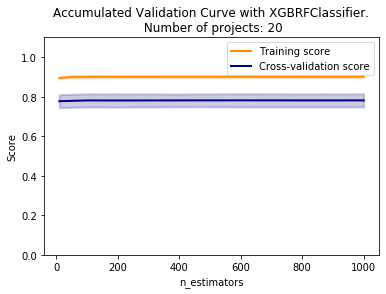

In [9]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.get_validation_curve_all(projects, rf_xg, 'n_estimators',
                                        [10,50,100,200,400,600,800,1000],
                                        non_features_columns)

### Per project

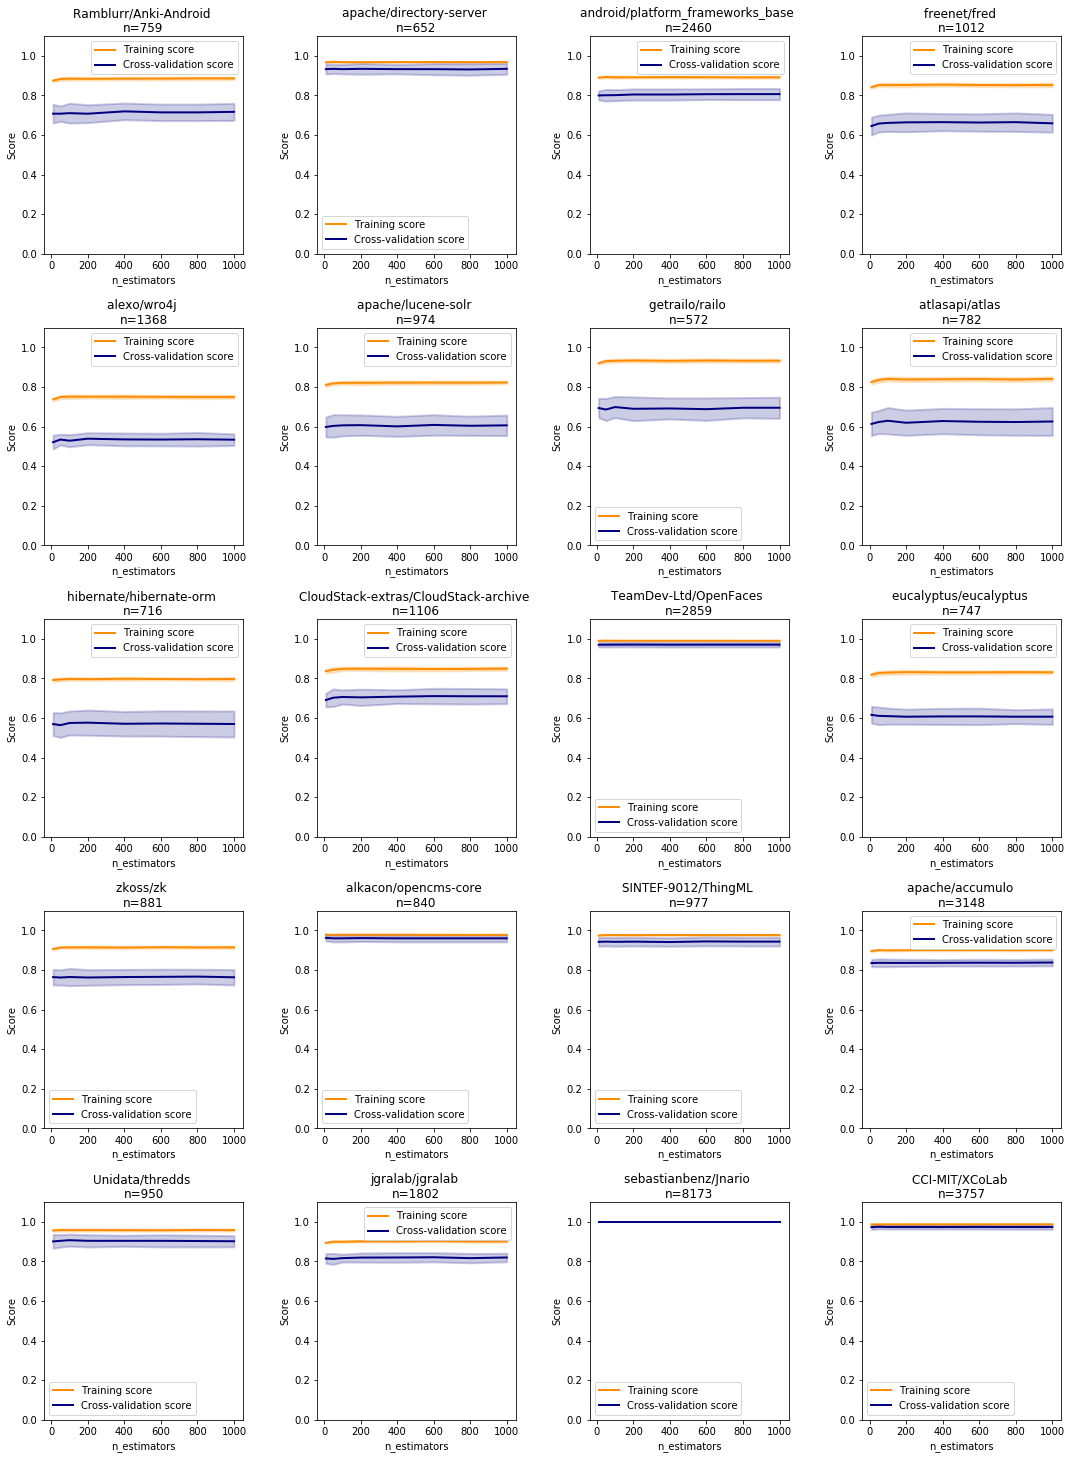

In [10]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.plot_validation_curves(projects, rf_xg, 'n_estimators',
                                        [10,50,100,200,400,600,800,1000],
                                        non_features_columns)

#### colsample_bynode

colsample_bynode : float, default=0.8

relative number of features used at each split point 0 to 1.0

### Overall

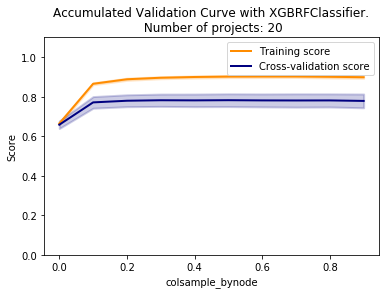

In [11]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.get_validation_curve_all(projects, rf_xg, 'colsample_bynode',
                                        np.arange(0,1,0.1),
                                        non_features_columns)

### Per project

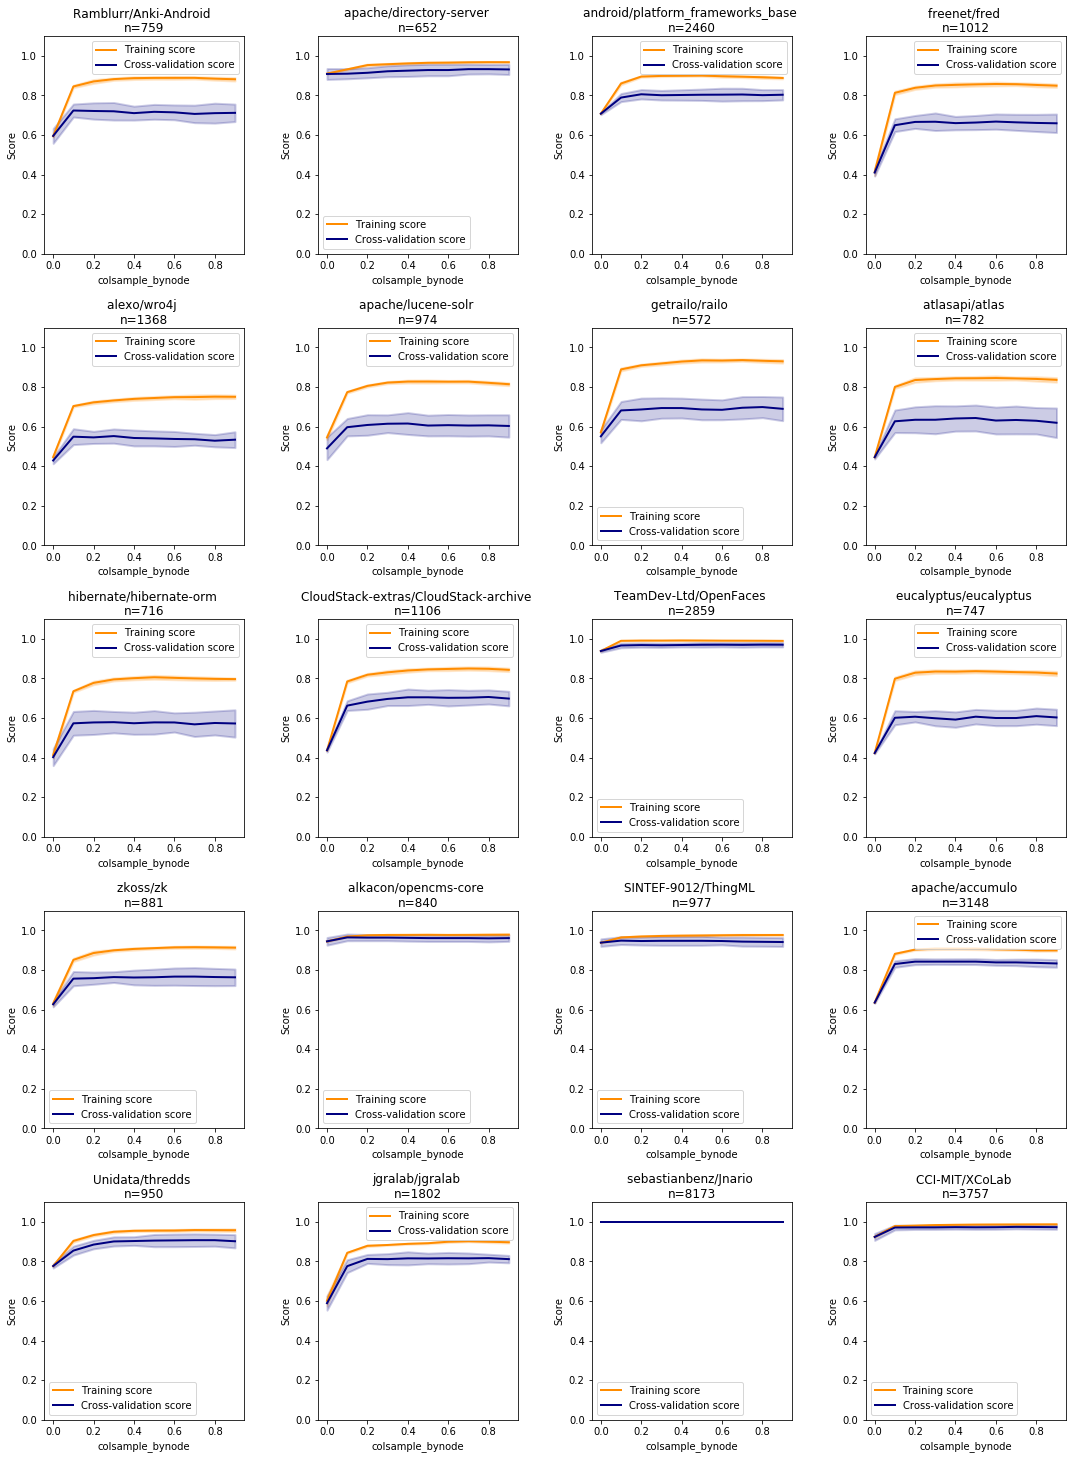

In [12]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.plot_validation_curves(projects, rf_xg, 'colsample_bynode',
                                        np.arange(0,1,0.1),
                                        non_features_columns)

### Tuning hyperparameters


Parameters range to explore, according to the validation curves:
- n_estimators: no visible difference. compare 100 and 400.
- colsample_bynode: after 0.1, no visible difference. compare 0.2 and 0.4




In [13]:
print("Hyperparameters of XGBoost Random Forest:")
rf_xg.get_params()

Hyperparameters of XGBoost Random Forest:


{'colsample_bynode': 0.8,
 'learning_rate': 1,
 'reg_lambda': 1e-05,
 'subsample': 0.9,
 'use_label_encoder': True,
 'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 99,
 'reg_alpha': None,
 'scale_pos_weight': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'eval_metric': 'mlogloss'}

In [14]:
parameters = {'n_estimators':[100,400],
              'colsample_bynode':[0.2,0.4]
             }

In [21]:
results = classifier_utils.grid_search_all(projects, rf_xg, parameters, non_features_columns)

### Ranking combinations by medals

In [22]:
results.sort_values(['gold_medals', 'silver_medals', 'bronze_medals', 'total_medals'], ascending=False)

,n_estimators,colsample_bynode,mean_accuracy,total_medals,gold_medals,silver_medals,bronze_medals,mean_rank
3,400,0.4,0.783362,18,12,6,0,1.60
1,100,0.4,0.781531,15,8,4,3,2.25
2,400,0.2,0.779753,13,5,2,6,2.75
0,100,0.2,0.779700,19,2,7,10,2.50


### Ranking combinations by mean rank

In [23]:
results.sort_values(['mean_rank'])

,n_estimators,colsample_bynode,mean_accuracy,total_medals,gold_medals,silver_medals,bronze_medals,mean_rank
3,400,0.4,0.783362,18,12,6,0,1.60
1,100,0.4,0.781531,15,8,4,3,2.25
0,100,0.2,0.779700,19,2,7,10,2.50
2,400,0.2,0.779753,13,5,2,6,2.75


## Comparing the models with the best parameters with the base model

In [24]:
base_model = rf_xg
model_1 = XGBRFClassifier(random_state=99, subsample=0.9, eval_metric='mlogloss', n_estimators=400, colsample_bynode=0.4)
model_2 = XGBRFClassifier(random_state=99, subsample=0.9, eval_metric='mlogloss', n_estimators=100, colsample_bynode=0.4)
model_3 = XGBRFClassifier(random_state=99, subsample=0.9, eval_metric='mlogloss', n_estimators=400, colsample_bynode=0.2)

In [25]:
models = [base_model, model_1, model_2, model_3]
models_names = ['base', 'model1', 'model2', 'model3']
import importlib
importlib.reload(classifier_utils)
comparison = classifier_utils.compare_models(models, models_names, projects, non_features_columns)

In [26]:
comparison.filter(regex=("model|accuracy|precision|recall")).sort_values(['accuracy'], ascending=False)

,accuracy,model,precision,recall
1,0.78335,model1,0.77125,0.78335
2,0.78155,model2,0.76965,0.78155
0,0.78135,base,0.77150,0.78135
3,0.77970,model3,0.76675,0.77970
